<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Sequences and Series

This notebook picks up on Zeno's problem to investigate some further applications of sequences and their sums; **series**.  We will focus on four sequences of integers and their powers:


```python
int1 = [1, 2, 3, 4, 5, ... ]
intsq = [1**2, 2**2, 3**2, 4**2, 5**2, ... ]
intcbd = [1**3, 2**3, 3**3, 4**3, 5**3, ... ]
intfrth = [1**4, 2**4, 3**4, 4**4, 5**4, ... ]
```

Let's create these sequences and then plot them all on a $2 \times 2$ grid.

In [1]:
int1 = [(i+1) for i in range(10)]
intsq = [(i+1)**2 for i in range(10)]
intcbd = [(i+1)**3 for i in range(10)]
intfrth = [(i+1)**4 for i in range(10)]

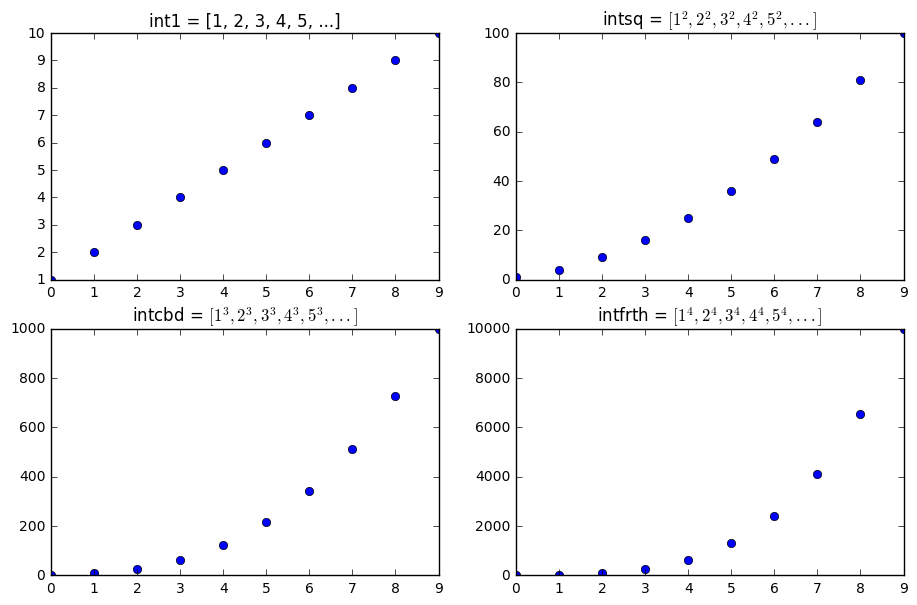

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize = (11, 7))
plt.subplot(221)
plt.plot(int1, 'o')
plt.title("int1 = [1, 2, 3, 4, 5, ...]")

plt.subplot(222)
plt.plot(intsq, 'o')
plt.title("intsq = $[1^2, 2^2, 3^2, 4^2, 5^2, ...]$")

plt.subplot(223)
plt.plot(intcbd, 'o')
plt.title("intcbd = $[1^3, 2^3, 3^3, 4^3, 5^3, ...]$")



plt.subplot(224)
plt.plot(intfrth, 'o')
plt.title("intfrth = $[1^4, 2^4, 3^4, 4^4, 5^4, ...]$")

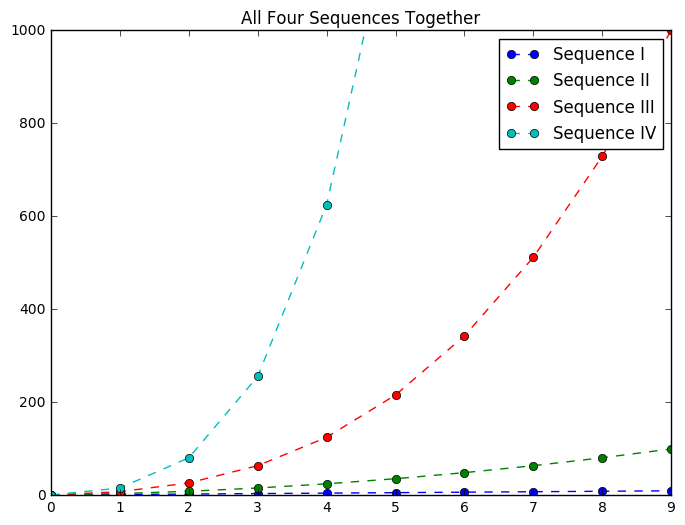

In [3]:
plt.figure(figsize = (8, 6))
plt.plot(int1, '--o', label = "Sequence I")
plt.plot(intsq, '--o', label = "Sequence II")
plt.plot(intcbd, '--o', label = "Sequence III")
plt.plot(intfrth, '--o', label = "Sequence IV")
plt.ylim(0, 1000)
plt.legend()
plt.title("All Four Sequences Together")

### Patterns within the Sequences

We are interested in being able to do something similar with what we had accomplished in recognizing the patterns in sequences.  We will be interested in two specific patterns-- that of the sequence itself and those of its partial sums.  Let's look at these patterns for sequence I, the integers.  

#### Partial Sums

With Zeno's problem, we were also interested in the addition of all the pieces of the picture.  We will do the same for the sequences above.  To begin, we will look if there is an easily discernable pattern in the **partial sums** of the sequence.  This means we will form another sequence based on the sum of the first $n$ terms of `int1`.  This would mean:

$$\text{psum_s1} = [1, 1+2, 1+2+3, 1+2+3+4, ...]$$

Since we already have the sequence `seq1`, we can use a list comprhension to easily form the sequence of partial sums and a side by side plot of the sequence and its partial sums.

In [4]:
psum_s1 = [sum(int1[:i+1]) for i in range(10)]
psum_s1

[1, 3, 6, 10, 15, 21, 28, 36, 45, 55]

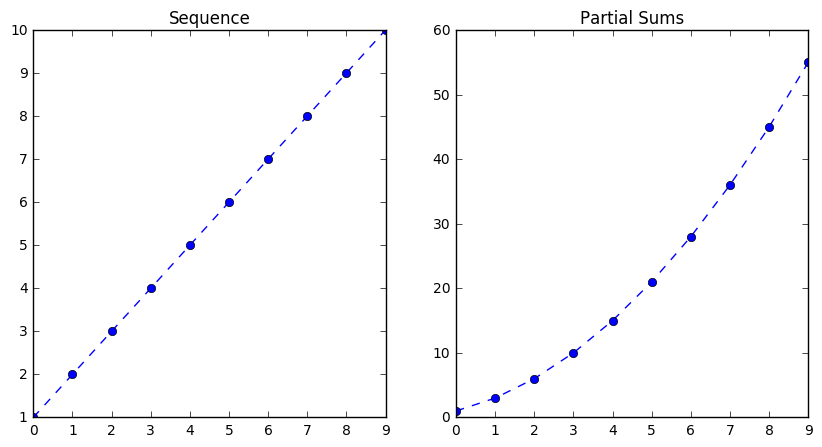

In [5]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(int1, '--o')
plt.title("Sequence")

plt.subplot(122)
plt.plot(psum_s1, '--o')
plt.title("Partial Sums")

We have seen these patterns before with our arithmetic and quadratic sequences.  Notice the constant difference and first term of the integer sequence, and the constant rate of change between terms in its partial sums, leading to the quadratic case.  It may not be immediately obvious what quadratic, but this is an important relationship nonetheless.  The partial sums of an arithmetic sequence form a quadratic.  

### A Different Visualization

This is a more advanced graphic to make on the computer, but it serves a nice purpose for understanding the general pattern to the partial sums. Here, we create a rectangular grid that helps us understand the triangular numbers.  We create an array of values where each row has one more 1, and color these.  We should recognize the connection to the Red and Blue pieces of the series.  Here, the area of the figures represents the sum of the terms.  In the first figure for example, we have a geometric representation of the sum of the first four terms of the sequence of integers.  



In [6]:
from ipywidgets import interact, widgets, fixed 

In [7]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [8]:
def tri_numplot(n=4):
    plt.figure(figsize=(6.0, 6.0))
    a=np.zeros((n,n+1))#creates an n by n+1 array of zeros
    for i in range(n):
        for j in range(i+1):
            a[i,j]=1
    a=np.flipud(a)        
    plt.pcolor(a, edgecolors='k', linewidths=4)
    plt.axis('tight')
    plt.axis('off')
    plt.title("Geometry of Partial Sums")
            

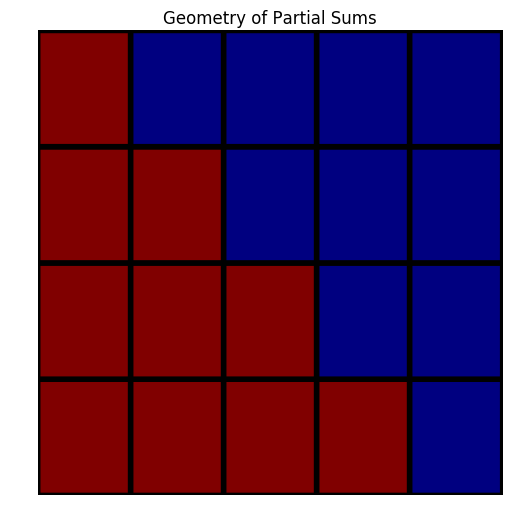

In [9]:
tri_numplot(4)

#### Generalizing the Partial Sums

Now, we can investigate to whether this pattern will hold for larger values of `n` with a slider.  Pay attention to the area of the figures.

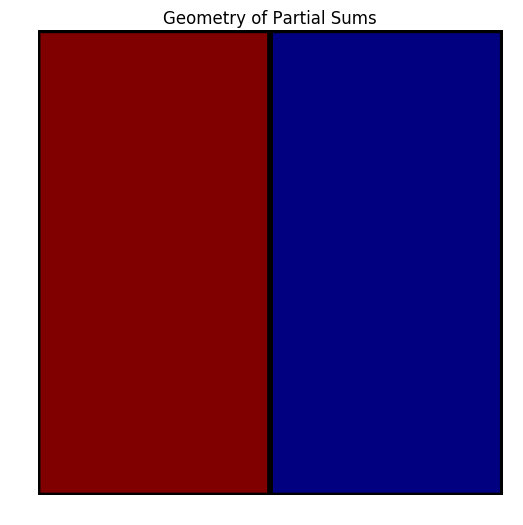

In [10]:
interact(tri_numplot, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

Notice the geometry forms a rectangle with dimensions:
    
$$n \times (n +1)$$

This is the total for two sequences though, and we only want one so we can divide this in half and we've determined a formula for the partial sums as:

$$\displaystyle \frac{n(n+1)}{2} = \frac{1}{2}n^2 + \frac{1}{2}n$$

We should be able to verify this with a plot of this function and a plot of the partial sums together.  Here, we plot a function 

$$s(n) = \frac{1}{2}n^2 + \frac{1}{2}n$$

Be careful about the indicies to see that your plot begins with the same terms.

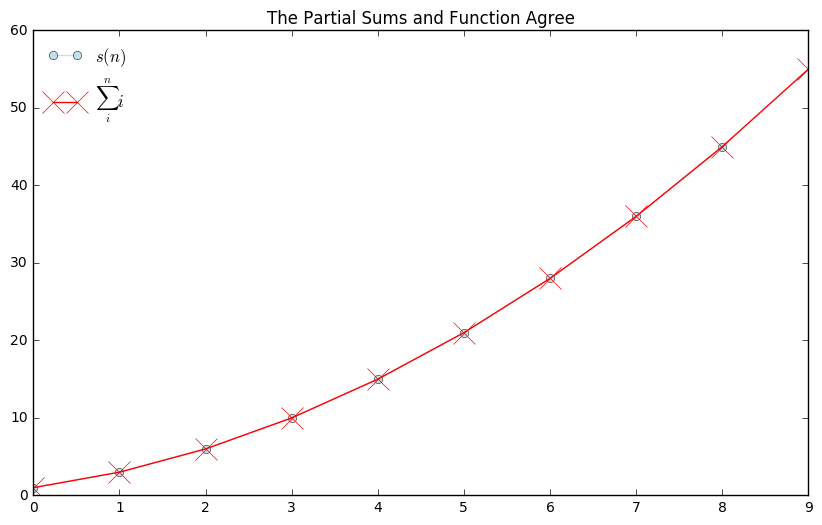

In [11]:
def s(n):
    return 0.5*n**2 + 0.5*n

n = np.arange(1, 10)

plt.figure(figsize = (10, 6))
plt.plot(s(n), '-o', alpha = 0.7, color = 'lightblue', label = "$s(n)$")
plt.plot(psum_s1, '-x', markersize = 16, color = 'red', label = "$\sum_i ^n i$")
plt.title("The Partial Sums and Function Agree")
plt.legend(loc = "best", frameon = False)

#### Example 2

Let's look at the same patterns for our sequence III, the integers cubed and its partial sums.  As a reminder, here we have

```python
intcbd = [1**3, 2**3, 3**3, 4**3, ...]
```

We will form the partial sums of the sequence in a similar manner to before, and see if we recognize a pattern.

In [12]:
psum_cbd =  [sum(intcbd[:i+1]) for i in range(10)]

In [13]:
intcbd, psum_cbd

([1, 8, 27, 64, 125, 216, 343, 512, 729, 1000],
 [1, 9, 36, 100, 225, 441, 784, 1296, 2025, 3025])

The values of `cb_sums` should look familiar.  They are $1^2, 3^2, 6^2, 10^2, ...$  the squares of the partial sums of `int1`.  



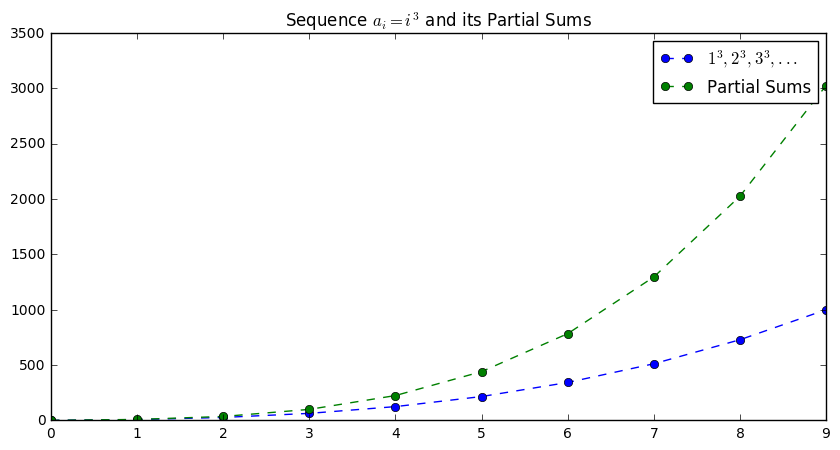

In [14]:
plt.figure(figsize = (10, 5))

plt.plot(intcbd, '--o', label = "$1^3, 2^3, 3^3, ...$")
plt.plot(psum_cbd, '--o', label = "Partial Sums")
plt.title("Sequence $a_i = i^3$ and its Partial Sums")
plt.legend()

Recalling our earlier results, we have a formula for the partial sums of the integers as $\frac{1}{2}(n^2 +n)$.

We can use this to generalize the partial sums here as:

$$\sum_i^n i^3 = \big[ \frac{1}{2}n^2 +n \big]^2$$

Again, we can create a function based on the pattern in the partial sums and compare it to the sequence of partial sums as follows.

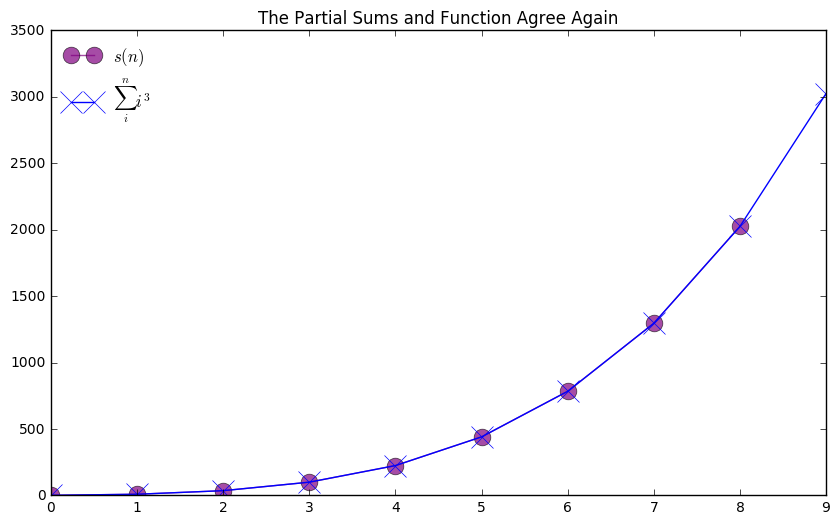

In [15]:
psum_cbd = [sum(intcbd[:i+1]) for i in range(10)]


def s(n):
    return (0.5*n**2 + 0.5*n)**2

n = np.arange(1, 10)

plt.figure(figsize = (10, 6))
plt.plot(s(n), '-o', alpha = 0.7, markersize = 12, color = 'purple', label = "$s(n)$")
plt.plot(psum_cbd, '-x', markersize = 16, color = 'blue', label = "$\sum_i ^n i^3$")
plt.title("The Partial Sums and Function Agree Again")
plt.legend(loc = "best", frameon = False)

### Symbolic Solutions by Hand

Here, we were able to recognize the pattern and generalize this by relating it to another
pattern we knew.  This allows us to simplify the expression we found above and represented as a closed function as follows:

$$(\frac{1}{2}n^2 + \frac{1}{2}n)^2$$

$$(\frac{1}{2}n^2 + \frac{1}{2}n) \times (\frac{1}{2}n^2 + \frac{1}{2}n)$$

$$(\frac{1}{2}n^2 \times \frac{1}{2}n^2) ~ + (\frac{1}{2}n^2 \times \frac{1}{2}n ) ~
+ (\frac{1}{2}n \times \frac{1}{2}n^2) ~ + (\frac{1}{2}n \times \frac{1}{2}n)$$

$$\frac{n^4}{4} + \frac{n^2}{2} + \frac{n}{4}$$

This isn't always so easy to see, and we will often resort to other means for recognizing the general form of patterns.  One way to do so is to use the SymPy library to solve these symbolic problems.  We demonstrate finding these general forms using SymPy below.

### SymPy and Summations

![](http://www.sympy.org/static/images/logo.png)

SymPy allows us to use the computer to perform operations on symbols like we did above.  We demonstrate the solution to the above problem to begin.

First, we import the SymPy library and abbreviate it as `sy`.  Next, we declare `n` a symbol.  This is an important step.  Whenever we want to work on something symbolically, we need to be sure to tell Python to consider the object a symbol.

Then, we name an expression based on our above formulation.  

SymPy can easily factor and expand expressions, and then we can substitute values in for $n$ using  `.subs`.


In [16]:
import sympy as sy

n = sy.Symbol('n')

exp = (.5*n**2 + .5*n)**2

In [17]:
exp

(0.5*n**2 + 0.5*n)**2

In [18]:
sy.expand(exp)

0.25*n**4 + 0.5*n**3 + 0.25*n**2

In [19]:
sy.factor(exp)

0.25*n**2*(n + 1)**2

In [20]:
exp.subs(n, 3)

36.0000000000000

#### Summations on Symbols

Besides being able to factor, expand, and evaluate known expressions, we can use SymPy to find the general expressions using its `summation` command.  Here, we enter the expression we want to sum, the index value, and the start and stop points.  We can find the symbolic expression and determine the value as n gets bigger and bigger.

We would represent the problem of the two summations as follows:

$$\sum_{i = 1} ^ n i$$

We write this similarly in Sympy.  We must add the symbol `i` first, then ask the summation function to find the sum of `i` from 1 to `n`.  



In [21]:
i = sy.Symbol('i')
sum1 = sy.summation(i, (i, 1, n))

We can get these results to appear in nice printing with the `pprint` function.

In [22]:
sy.pprint(sum1)

 2    
n    n
── + ─
2    2


In [23]:
sum2 = sy.summation(i**2, (i, 1, n))
sy.pprint(sum2)

 3    2    
n    n    n
── + ── + ─
3    2    6


In [24]:
sum3 = sy.summation(i**3, (i, 1, n))
sy.pprint(sum3)

 4    3    2
n    n    n 
── + ── + ──
4    2    4 


In [25]:
sum4 = sy.summation(i**4, (i, 1, n))
sy.pprint(sum4)

 5    4    3     
n    n    n    n 
── + ── + ── - ──
5    2    3    30


Do you see a pattern here?

### Other Patterns in Expressions

We can also use `sympy` to expand binomial expressions.  Here we look to see if there is a pattern in the coefficients.

In [26]:
from sympy import Symbol, expand
x= Symbol('x')
y = Symbol('y')
expr1 = (x + y)**1
expand(expr1)

x + y

In [27]:
expr2= (x+y)**2
sy.pprint(expand(expr2))

 2            2
x  + 2⋅x⋅y + y 


#### Continue the Work

Continue to expand expressions 

$$(x+y)^n \quad \text{for} \quad n=1,2,3,4,\text{and} \quad 5.$$

Do you recognize the pattern in coefficients?


In [28]:
for i in range(1,5):
    expr3 = (x+y)**i
    sy.pprint(expand(expr3))

x + y
 2            2
x  + 2⋅x⋅y + y 
 3      2          2    3
x  + 3⋅x ⋅y + 3⋅x⋅y  + y 
 4      3        2  2        3    4
x  + 4⋅x ⋅y + 6⋅x ⋅y  + 4⋅x⋅y  + y 
